In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    matthews_corrcoef,
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    log_loss,
)




In [ ]:
# Step 1: Data Preprocessing

# Load the TelCoX Customer Churn Dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Inspect the structure of the dataset
print(df.head())
print(df.info())



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:

# Encode categorical variables for modeling
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])



In [ ]:
# Step 2: Logistic Regression Model Building

# Split the dataset into training and testing sets (80% training, 20% testing)
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Build a baseline logistic regression model using default settings
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Train the model on the training data
y_pred = logistic_model.predict(X_test)



In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
logloss = log_loss(y_test, logistic_model.predict_proba(X_test))

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Cohen's Kappa Score: {kappa:.2f}")
print(f"Matthews Correlation Coefficient: {mcc:.2f}")
print(f"Log Loss: {logloss:.2f}")

Accuracy: 0.80
Precision: 0.65
Recall: 0.56
F1-score: 0.60
ROC AUC: 0.72
Cohen's Kappa Score: 0.47
Matthews Correlation Coefficient: 0.47
Log Loss: 0.41


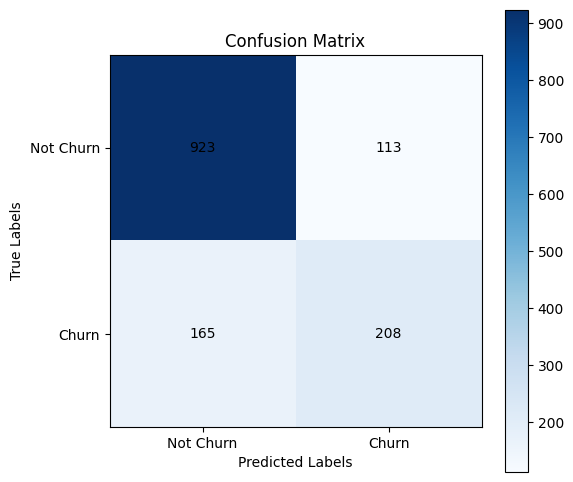

In [ ]:
# Create a confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.title('Confusion Matrix')
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.yticks([0, 1], ['Not Churn', 'Churn'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.show()



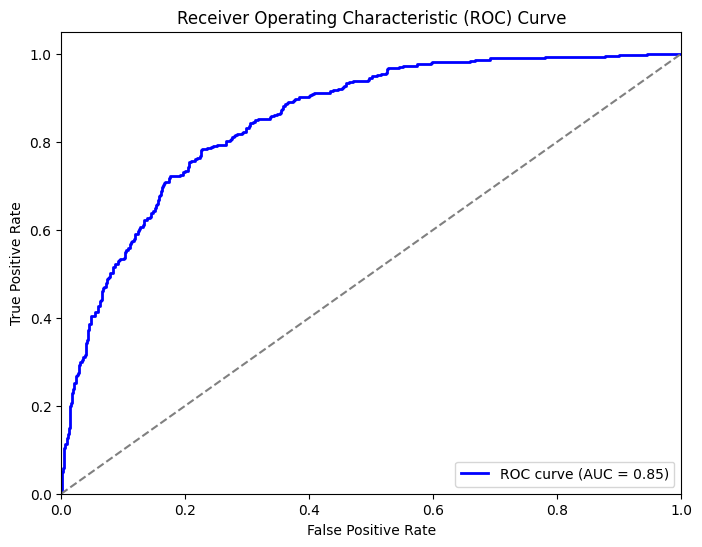

In [ ]:
# Plot the ROC curve and calculate the AUC
y_probs = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



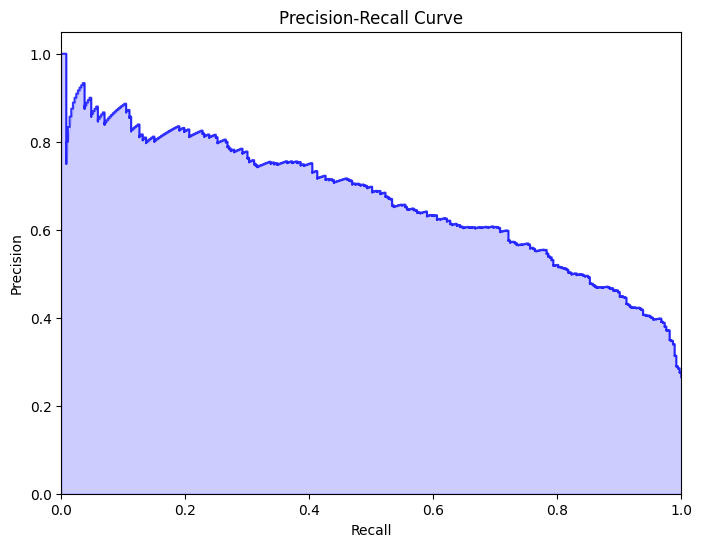

In [ ]:
# Visualize the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='blue', where='post', alpha=0.8)
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
#Logistic Regression does not inherently provide log loss curve during training.

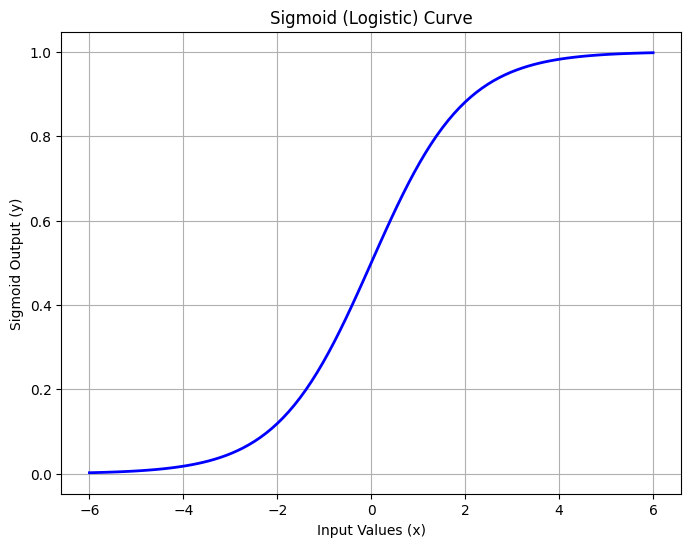

In [ ]:
# Sigmoid Curve Visualization
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-6, 6, 100)
y = sigmoid(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', lw=2)
plt.title('Sigmoid (Logistic) Curve')
plt.xlabel('Input Values (x)')
plt.ylabel('Sigmoid Output (y)')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter Tuning
# Perform hyperparameter tuning to optimize the logistic regression model
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Tuning regularization strength (C)
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [ ]:
# Get the best hyperparameter values
best_C = grid_search.best_params_['C']



In [ ]:
# Build a logistic regression model with the best hyperparameters
best_logistic_model = LogisticRegression(C=best_C, random_state=42)
best_logistic_model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, random_state=42)

In [ ]:
# Evaluate the model's performance with optimized hyperparameters
y_pred_best = best_logistic_model.predict(X_test)
roc_auc_best = roc_auc_score(y_test, best_logistic_model.predict_proba(X_test)[:, 1])

print("Optimized Model Metrics:")
print(f"Best C Value: {best_C}")
print(f"Optimized ROC AUC: {roc_auc_best:.2f}")

Optimized Model Metrics:
Best C Value: 1
Optimized ROC AUC: 0.85


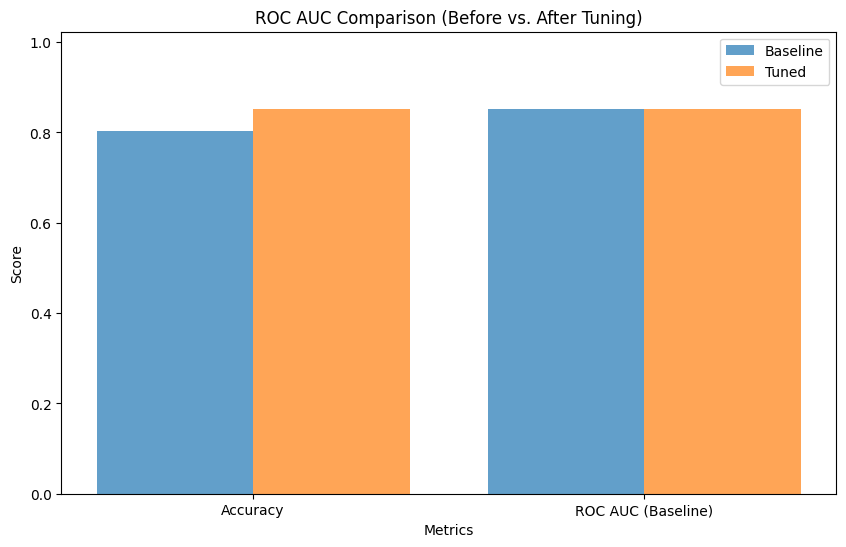

In [ ]:
# Define evaluation metrics for the baseline and tuned models
metrics_baseline = {
    'Accuracy': accuracy,
    'ROC AUC (Baseline)': roc_auc,
}

metrics_tuned = {
    'ROC AUC (Tuned)': roc_auc_best,
}

# Create bar plots to compare metrics
def plot_metrics_comparison(metrics1, metrics2, title):
    plt.figure(figsize=(10, 6))
    metrics_names = list(metrics1.keys())
    values1 = list(metrics1.values())
    values2 = list(metrics2.values())

    x = range(len(metrics_names))

    plt.bar(x, values1, width=0.4, label='Baseline', align='center', alpha=0.7)
    plt.bar([i + 0.4 for i in x], values2, width=0.4, label='Tuned', align='center', alpha=0.7)

    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title(title)
    plt.xticks([i + 0.2 for i in x], metrics_names)
    plt.legend(loc='best')
    plt.ylim(0, 1.2 * max(max(values1), max(values2)))

    plt.show()

# Plot ROC AUC comparison
plot_metrics_comparison(metrics_baseline, metrics_tuned, 'ROC AUC Comparison (Before vs. After Tuning)')

Focus on Customer Retention Programs.

Improve Customer Service: Analyze the customer feedback and complaints data to identify common issues and pain points. Address these concerns promptly to improve overall customer satisfaction and loyalty.

Enhance Communication: Use the insights from the model to tailor communication strategies for different customer segments. This may involve sending proactive notifications, updates, or reminders to customers about their services, billing, and upcoming promotions.

Upsell and Cross-sell.
